In [1]:
#Librerías a usar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pyflux as pf

### Importación de datos

In [2]:
#Leemos y visualizamos los datos:
df = pd.read_csv("ParisIndex-2016-2023.csv",index_col=0)
df

,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,...,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-25,2023-09-26,2023-09-27,2023-09-28,2023-09-29
Close,4522.450195,4537.629883,4480.470215,4403.580078,4333.759766,4312.740234,4378.75,4391.939941,4312.890137,4210.160156,...,7276.140137,7282.120117,7330.790039,7213.899902,7184.819824,7123.879883,7074.02002,7071.790039,7116.240234,7135.060059


In [3]:
#Primero transformamos el dataframe a un formato más cómodo en el que los índices de los valores son las fechas
df = df.T
#Posteriormente transformamos los índices a formato 'date-time' ya que originalmente son de tipo 'Object'
df.index = pd.to_datetime(df.index)
#vemos como quedó nuestro dataframe
df.head(5)

,Close
2016-01-04,4522.450195
2016-01-05,4537.629883
2016-01-06,4480.470215
2016-01-07,4403.580078
2016-01-08,4333.759766


In [4]:
df.shape

(1986, 1)

###Retornos normales

$r_t  = \frac{y_t-y_{t-1}}{y_{t-1}}$

log returns $log(\frac{y_t}{y_{t-1}})$

In [5]:
def returns (df):
  returns  = df.diff()/df
  return returns.dropna()

def log_returns (df):
  returns = np.zeros(len(df)-1)
  for t in range(len(df)-1):
    if t==0:
      pass
    else:
      returns[t] = np.log((df.iloc[t])/df.iloc[t-1])
  return returns

### Visualización

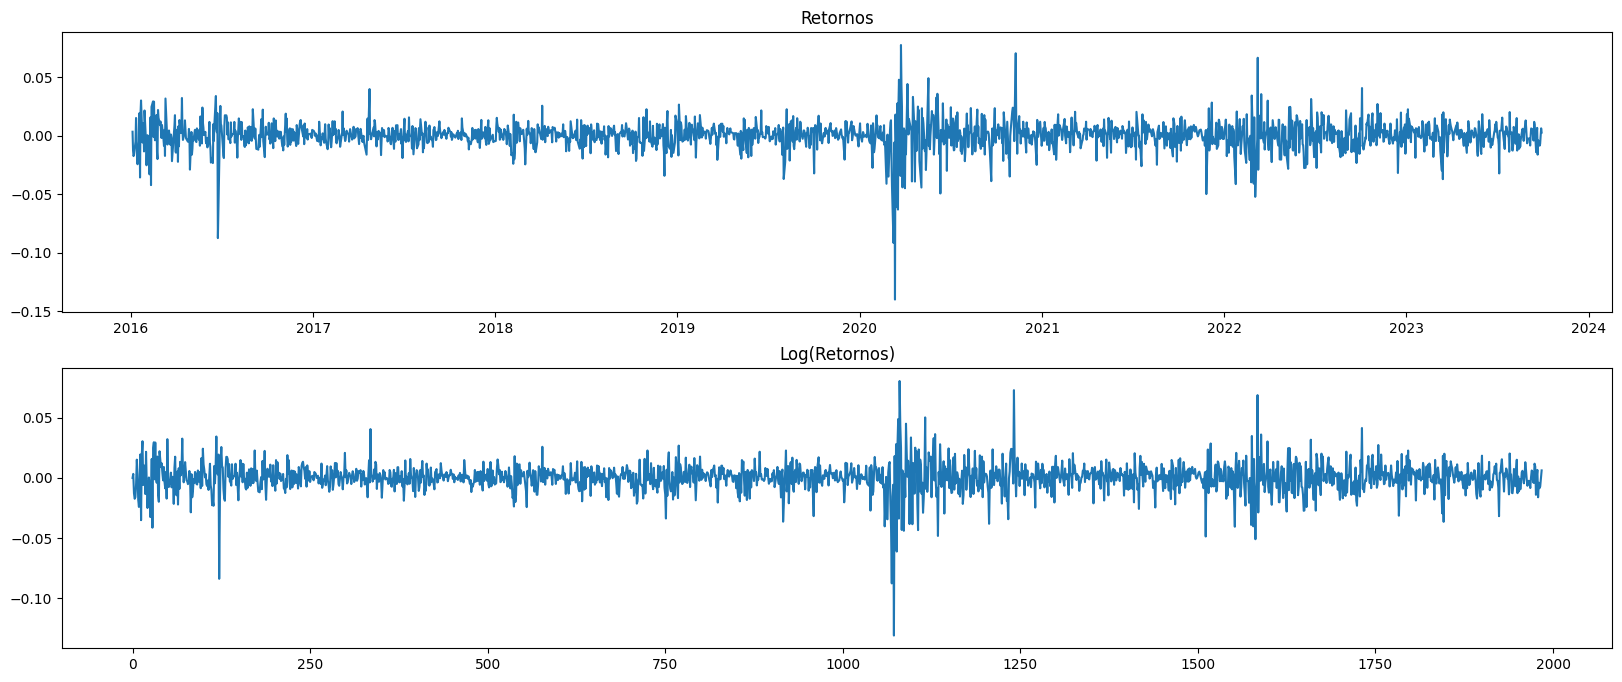

In [6]:
r = returns(df)
log_r = log_returns(df)

plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(r)
plt.title("Retornos")

plt.subplot(2,1,2)
plt.plot(log_r)
plt.title("Log(Retornos)")
plt.show()

### Datos de entrenamiento y prueba

In [7]:
# Dividimos la serie de tiempo en datos de entrenamiento (train) y de prueba (test)
# También lo hacemos para la serie con logaritmo

#Tenemos un total de 1985 valores de retornos
#Tenemos un total de 1047 valores del logaritmo de retornos (descartando NaN)

train=r.iloc[:1786] #primeros 1786 datos
test=r.iloc[1786:] #del dato 1786 hasta el último
train_log=log_r[:1786]
test_log=log_r[1786:]

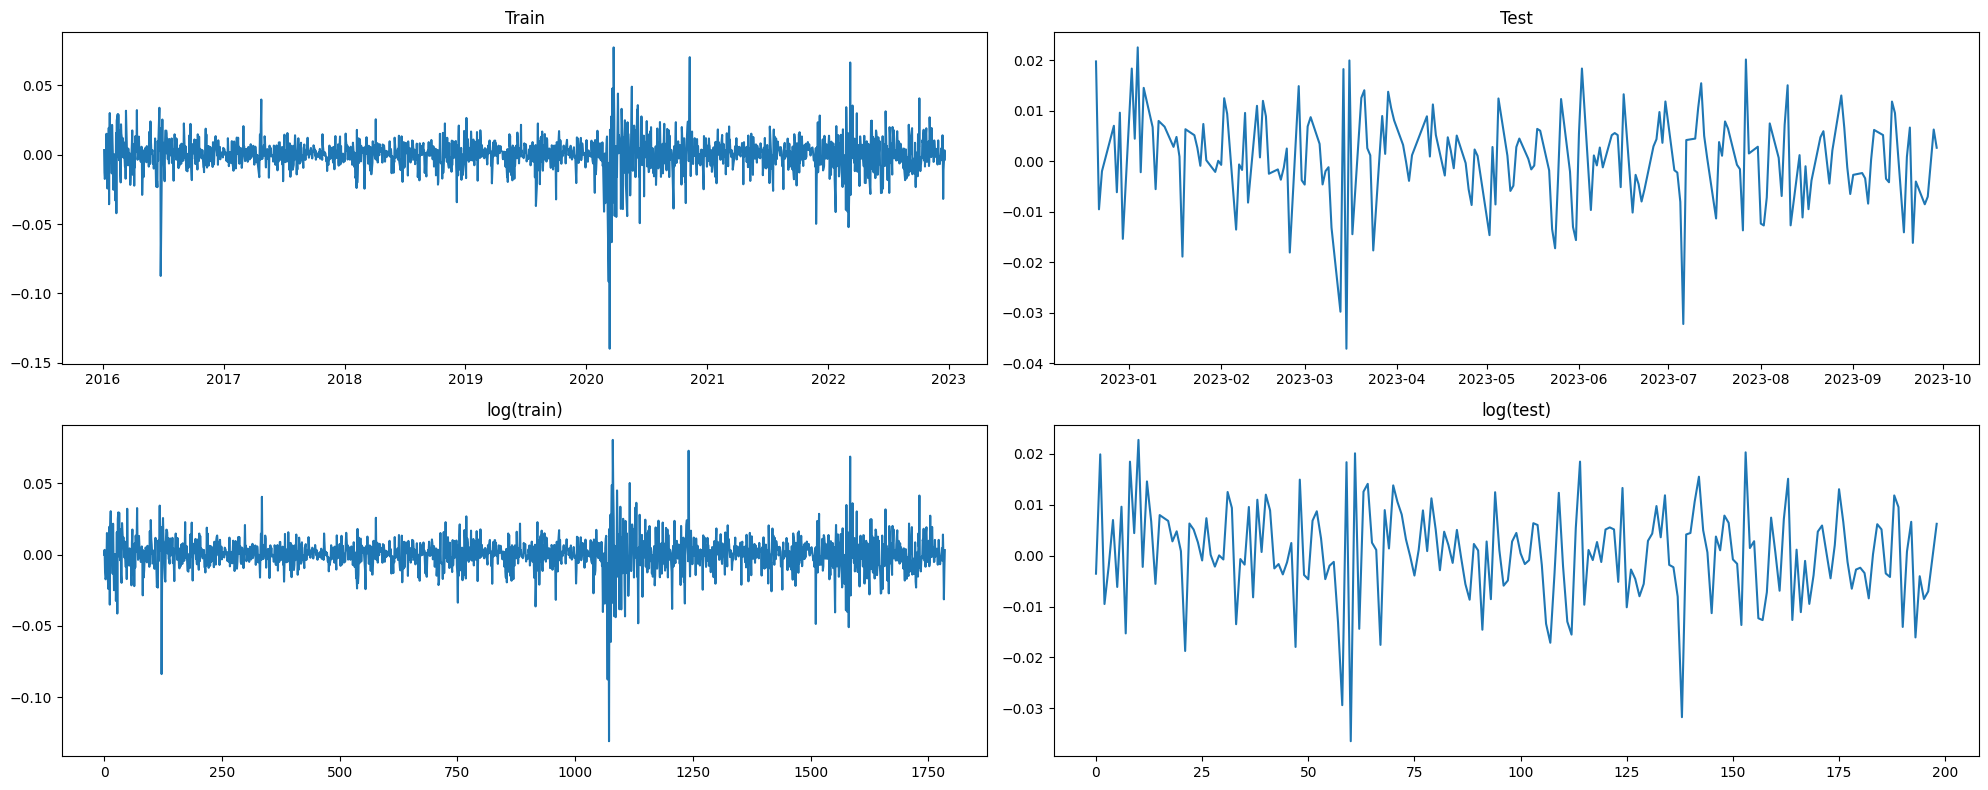

In [8]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(train)
plt.title("Train")

plt.subplot(2,2,2)
plt.plot(test)
plt.title("Test")

plt.subplot(2,2,3)
plt.plot(train_log)
plt.title("log(train)")

plt.subplot(2,2,4)
plt.plot(test_log)
plt.title("log(test)")
plt.tight_layout()
plt.show()

#### ACF y PACF

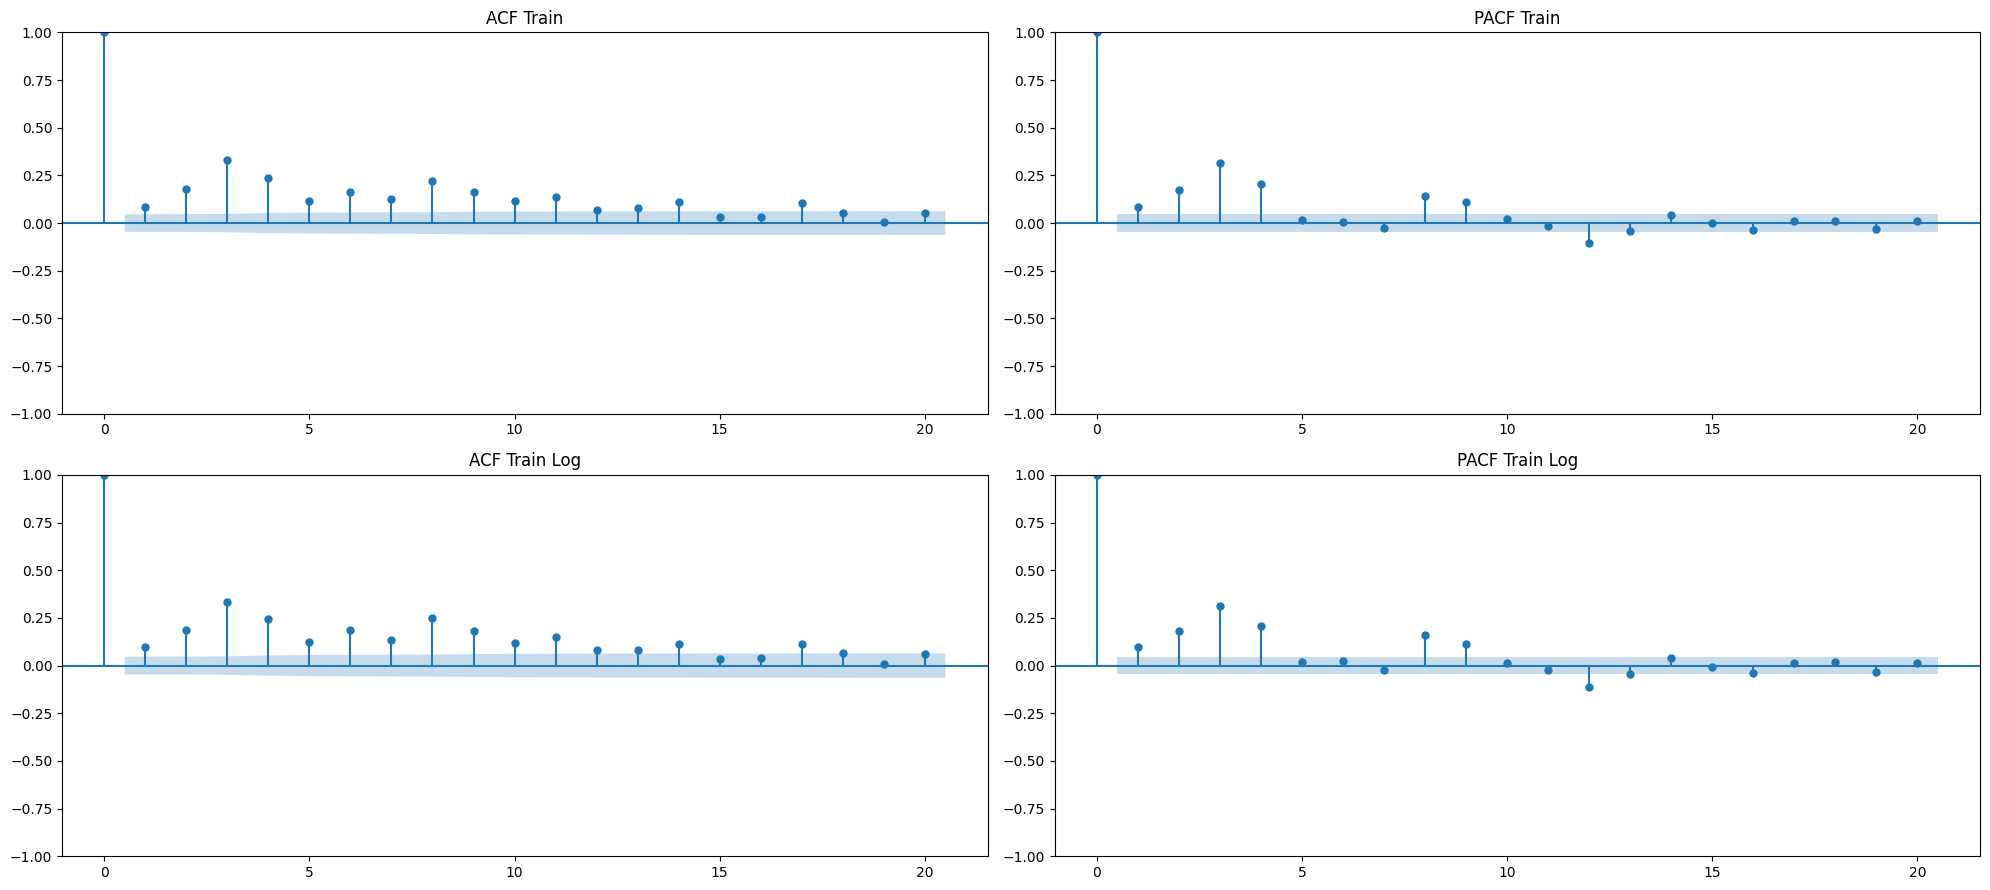

In [9]:
fig , ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (20,9))

train2 = train*train
log_train2 = train_log*train_log

plot_acf(train2,lags=20, ax=ax1)
plot_pacf(train2,lags=20, ax=ax2)
plot_acf(log_train2,lags=20, ax=ax3)
plot_pacf(log_train2,lags=20, ax=ax4)


ax1.set_title("ACF Train")
ax2.set_title("PACF Train")
ax3.set_title("ACF Train Log")
ax4.set_title("PACF Train Log")



plt.tight_layout()
plt.show()

vemos que para el conjunto de retornos los parámetros estimados son $p=2 $ y $q= 2$

y para el logaritmo de los retornos $p= 4$ y $q = 7$

## GARCH

In [25]:
model = pf.GARCH(train.values,p=1,q=1)
x = model.fit()
#x.summary()

In [26]:
pf.plot_fit()

AttributeError: module 'pyflux' has no attribute 'plot_fit'

In [ ]:
pf.plot_predict_is()

AttributeError: ignored